# HFMD Image Classification with ResNet-50

### Proyek Turnamen Sains Data Nasional (TSDN)

#### Tim : Tim Bebasdehhh
#### Anggota :
####*   Bagas Dwi Santosa (Ketua)
####*   Muhammad Akbar Pradana

#### Universitas : Universitas Jenderal Achmad Yani Yogyakarta

## Import Library

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Set up Data Directories

In [ ]:
# Set up data directories
train_dir = 'drive/MyDrive/HFMD-Images-dataset/1_Train-set'
test_dir = 'drive/MyDrive/HFMD-Images-dataset/2_Test-set'

## Image Preprocessing

In [ ]:
# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary')

Found 603 images belonging to 2 classes.
Found 361 images belonging to 2 classes.


In [ ]:
# Setelah mendefinisikan test_generator
print(train_generator.class_indices)
print(test_generator.class_indices)

{'HFMD': 0, 'Not-HFMD': 1}
{'HFMD': 0, 'Not-HFMD': 1}


## Model Setup & Custom Classification Layers

In [ ]:
# Load ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Add custom classification layers
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model Training

In [ ]:
# Train the model
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 405s 18s/step - accuracy: 0.4779 - loss: 0.9457 - val_accuracy: 0.6537 - val_loss: 0.6496
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 57s 554ms/step - accuracy: 0.4526 - loss: 0.7779 - val_accuracy: 0.6482 - val_loss: 0.6336
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 542ms/step - accuracy: 0.5282 - loss: 0.6998 - val_accuracy: 0.6371 - val_loss: 0.6401
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 544ms/step - accuracy: 0.6109 - loss: 0.6539 - val_accuracy: 0.6427 - val_loss: 0.6248
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 568ms/step - accuracy: 0.6179 - loss: 0.6502 - val_accuracy: 0.6371 - val_loss: 0.6204
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 533ms/step - accuracy: 0.6289 - loss: 0.6467 - val_accuracy: 0.6565 - val_loss: 0.6220
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 574ms/step - accuracy: 0.6492 - loss: 0.6314 - val_accuracy: 0.6787 - val_loss: 0.6238
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 538ms/step - accuracy: 0.7122 - loss: 0.5781 - val_accuracy: 0.7313

## Model Evaluation

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.2f}')
print(f'Test accuracy: {accuracy:.2f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 464ms/step - accuracy: 0.7174 - loss: 0.5529
Test loss: 0.58
Test accuracy: 0.71


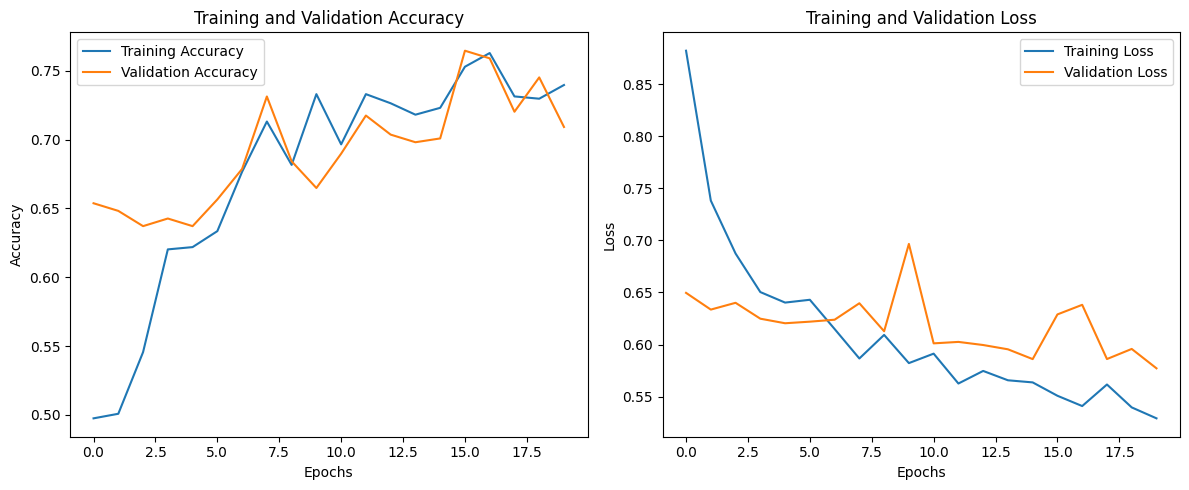

In [ ]:
import matplotlib.pyplot as plt

# Melatih model
# Visualisasi Akurasi
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Model Saving

In [ ]:
# model_resnet.save("model_resnet.h5")
model.save("drive/MyDrive/model_resnet.h5")

In [ ]:
# Menyimpan model dalam format HDF5
model.save("my_model.h5")

## Testing Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Memuat model yang sudah disimpan
model = load_model("my_model.h5")  # Sesuaikan nama file model Anda

# Fungsi untuk memuat dan memproses gambar
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [ ]:
# Path gambar baru yang ingin diuji
img_path = "test3.png"  # Sesuaikan dengan path gambar Anda

# Preprocessing gambar
img = preprocess_image(img_path)

# Melakukan prediksi
predictions = model.predict(img)
predicted_class = np.argmax(predictions, axis=1)

# Menampilkan hasil prediksi
print(f"Predicted class: {predicted_class[0]}")
print(f"Prediction confidence: {predictions[0][predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: 0
Prediction confidence: 0.02991894818842411


In [ ]:
# Path gambar baru yang ingin diuji
img_path = "Not-hfmd_rash_ (110).png"  # Sesuaikan dengan path gambar Anda

# Preprocessing gambar
img = preprocess_image(img_path)

# Melakukan prediksi
predictions = model.predict(img)

# Mengonversi probabilitas ke kelas 0 atau 1 dengan ambang batas 0.5
predicted_class = (predictions >= 0.5).astype(int)[0][0]  # 0 atau 1
confidence = predictions[0][0]  # Nilai probabilitas untuk kelas 1

# Menampilkan hasil prediksi
print(f"Predicted class: {predicted_class}")  # Menampilkan kelas (0 atau 1)
print(f"Prediction confidence: {confidence:.2f}")  # Menampilkan kepercayaan prediksi


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: 1
Prediction confidence: 0.82


In [ ]:
# Path gambar baru yang ingin diuji
img_path = "hfmd_rash_ (3).jpeg"  # Sesuaikan dengan path gambar Anda

# Preprocessing gambar
img = preprocess_image(img_path)

# Melakukan prediksi
predictions = model.predict(img)

# Mengonversi probabilitas ke kelas 0 atau 1 dengan ambang batas 0.5
predicted_class = (predictions >= 0.5).astype(int)[0][0]  # 0 atau 1
confidence = predictions[0][0]  # Nilai probabilitas untuk kelas 1

# Menampilkan hasil prediksi
print(f"Predicted class: {predicted_class}")  # Menampilkan kelas (0 atau 1)
print(f"Prediction confidence: {confidence:.2f}")  # Menampilkan kepercayaan prediksi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: 0
Prediction confidence: 0.33


12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 553ms/step


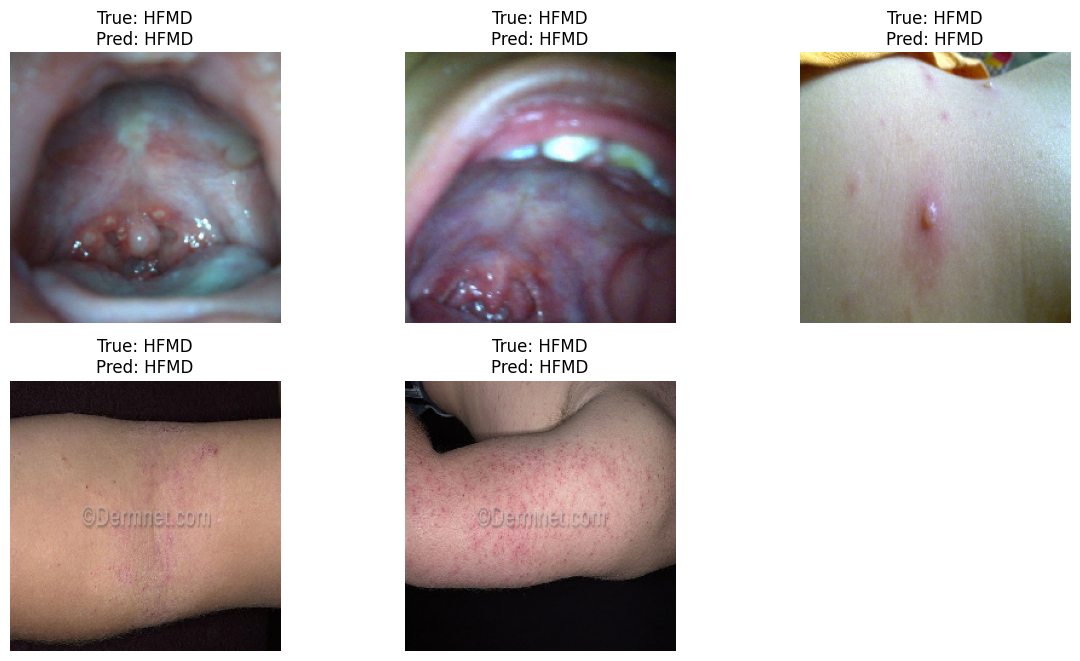

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Memuat model yang telah dilatih
model = load_model("my_model.h5")  # Sesuaikan nama file model Anda

# Melakukan prediksi pada set uji
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes  # Kelas sebenarnya
class_labels = list(test_generator.class_indices.keys())  # Label kelas

# Menampilkan gambar, label sebenarnya, dan label prediksi
num_images = 5  # Jumlah gambar untuk ditampilkan
plt.figure(figsize=(12, 10))

for i in range(num_images):
    # Memuat gambar dari generator
    img, label = test_generator[i]
    plt.subplot(3, 3, i + 1)

    # Menampilkan gambar
    plt.imshow(img[0])
    plt.axis('off')

    # Menampilkan prediksi dan label sebenarnya
    true_label = class_labels[true_classes[i]]
    pred_label = class_labels[predicted_classes[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}")

plt.tight_layout()
plt.show()
